<a href="https://colab.research.google.com/github/RNATCC/modelo-1/blob/master/Modelo_com_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

créditos:https://colab.research.google.com/drive/1FvBBw2JNXHy9WeJusI2PPr2PMnGVbbGM#scrollTo=GBotcBrgqR30 (lembrar de referenciar)

In [4]:
#%matplotlib inline
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#carregando o dataset
data_set = '/content/drive/My Drive/WESAD/'
s2_path = data_set + 'S2.pkl'
#modificação necessária pois os dados estavam em py2 e o ambiente usa py3
with open(s2_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')

In [7]:
#Separando dados de peito de dados de pulso (apenas dados de peito serão considerados conforme análise dos dados)
c_ax=s2_data['signal']['chest']['ACC'][0:,0]
c_ay=s2_data['signal']['chest']['ACC'][0:,1]
c_az=s2_data['signal']['chest']['ACC'][0:,2]
c_ecg=s2_data['signal']['chest']['ECG'][:,0]
c_emg=s2_data['signal']['chest']['EMG'][:,0]
c_eda=s2_data['signal']['chest']['EDA'][:,0]
c_temp=s2_data['signal']['chest']['Temp'][:,0]
c_resp=s2_data['signal']['chest']['Resp'][:,0]
label=s2_data['label']

# Alterar o objeto de dicionário para um array numpy e o array para um dataframe

*(referenciar)*
**Python | Numpy ndarray.T**
https://www.geeksforgeeks.org/python-numpy-ndarray-t/

**Gerando e Manipulando Arrays em Python**
https://towardsdatascience.com/numpy-array-cookbook-generating-and-manipulating-arrays-in-python-2195c3988b09

In [8]:
peito = [c_ax, c_ay, c_az, c_ecg, c_eda, c_emg, c_resp, c_temp, label]
p_array = np.array(peito)
p_array = p_array.T #(transposição matriz)
Colunas = ['c_ax', 'c_ay', 'c_az', 'c_ecg', 'c_eda', 'c_emg', 'c_resp', 'c_temp', 'label']

p_df = pd.DataFrame(p_array, columns = Colunas)
p_df

,c_ax,c_ay,c_az,c_ecg,c_eda,c_emg,c_resp,c_temp,label
0,0.9554,-0.2220,-0.5580,0.021423,5.250549,-0.004440,-1.148987,30.120758,0.0
1,0.9258,-0.2216,-0.5538,0.020325,5.267334,0.004349,-1.124573,30.129517,0.0
2,0.9082,-0.2196,-0.5392,0.016525,5.243301,0.005173,-1.152039,30.138214,0.0
3,0.8974,-0.2102,-0.5122,0.016708,5.249405,0.007187,-1.158142,30.129517,0.0
4,0.8882,-0.2036,-0.4824,0.011673,5.286407,-0.015152,-1.161194,30.130951,0.0
...,...,...,...,...,...,...,...,...,...
4255295,0.8750,-0.1234,-0.2974,-0.013138,0.400162,0.020370,-1.063538,31.457733,0.0
4255296,0.8750,-0.1262,-0.2988,-0.010345,0.355911,0.019592,-1.106262,31.476898,0.0
4255297,0.8718,-0.1238,-0.3042,-0.005447,0.360489,-0.017166,-1.103210,31.459229,0.0
4255298,0.8730,-0.1234,-0.3026,0.000137,0.365829,-0.028976,-1.086426,31.484283,0.0


In [9]:
p_df.describe().T

,count,mean,std,min,25%,50%,75%,max
c_ax,4255300.0,0.753866,0.175116,0.215000,0.621000,0.856800,0.892200,2.029800
c_ay,4255300.0,-0.133188,0.064173,-0.660000,-0.149800,-0.125600,-0.095800,0.539000
c_az,4255300.0,-0.422681,0.300236,-1.135400,-0.717200,-0.322200,-0.209800,1.246800
c_ecg,4255300.0,0.001212,0.154077,-1.499542,-0.067978,0.008240,0.044357,1.499313
c_eda,4255300.0,1.528387,1.238425,0.263214,0.799561,1.163101,1.546478,7.576752
c_emg,4255300.0,-0.002413,0.011652,-0.414963,-0.008331,-0.001602,0.003983,0.300980
c_resp,4255300.0,0.054906,2.917749,-27.903748,-1.481628,-0.157166,1.618958,27.378845
c_temp,4255300.0,30.876676,1.281106,28.045258,30.574951,31.289917,31.815125,34.370392
label,4255300.0,1.212370,1.606596,0.000000,0.000000,0.000000,2.000000,7.000000


Identificando os rótulos, usando apenas:
neutro: 0
stress: 1
diversão: 2

Os demais serão desconsiderados nesse estudo

In [10]:
neutro = p_df.loc[p_df['label'] == 1]
stress = p_df.loc[p_df['label'] == 2]


p_loc = pd.concat([neutro, stress])
p_loc

,c_ax,c_ay,c_az,c_ecg,c_eda,c_emg,c_resp,c_temp,label
214583,0.8914,-0.1102,-0.2576,0.030945,5.710983,-0.003708,1.191711,29.083618,1.0
214584,0.8926,-0.1086,-0.2544,0.033646,5.719376,-0.014145,1.139832,29.122437,1.0
214585,0.8930,-0.1094,-0.2580,0.033005,5.706406,0.010208,1.141357,29.115234,1.0
214586,0.8934,-0.1082,-0.2538,0.031815,5.712509,0.012634,1.155090,29.126709,1.0
214587,0.8930,-0.1096,-0.2570,0.030350,5.727005,0.002060,1.133728,29.100861,1.0
...,...,...,...,...,...,...,...,...,...
2021977,0.8760,-0.1346,-0.3020,0.001328,3.075409,-0.004715,-1.161194,31.163483,2.0
2021978,0.8770,-0.1352,-0.2998,0.003433,3.059769,-0.003937,-1.124573,31.090057,2.0
2021979,0.8806,-0.1334,-0.2978,0.003616,3.078079,-0.009018,-1.097107,31.098877,2.0
2021980,0.8778,-0.1314,-0.2964,0.003525,3.058624,0.004944,-1.103210,31.101807,2.0


# Normalizando dados: train test

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_axis.html (referenciar)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
 
# separar as variáveis independentes da variável alvo
x = p_loc.drop(['label'], axis=1)
y = p_loc['label']
 
# padronizar as colunas numéricas
X = StandardScaler().fit_transform(x)
 
# label encoder na variável alvo
Y = LabelEncoder().fit_transform(y)
 
# dividir o dataset entre treino e teste
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [12]:
x_train

,c_ax,c_ay,c_az,c_ecg,c_eda,c_emg,c_resp,c_temp
1958178,0.8846,-0.1310,-0.2766,0.098007,2.717590,0.003983,0.721741,31.050446
1747817,0.8950,-0.1118,-0.2038,0.022018,1.448059,-0.011307,-6.849670,31.387054
636676,0.6230,-0.0696,-0.7180,0.069077,1.592255,-0.007736,1.918030,28.351776
998607,0.6376,-0.0370,-0.6864,0.049026,1.100159,-0.007462,2.058411,31.031372
1890069,0.8586,-0.1444,-0.3254,-0.179947,1.895523,0.002060,-1.263428,31.303131
...,...,...,...,...,...,...,...,...
324851,0.6212,-0.0894,-0.7066,0.093613,3.407669,-0.012863,-1.194763,28.802307
473761,0.6262,-0.0584,-0.7078,0.290543,2.107239,0.002975,-1.942444,28.416046
346515,0.6490,-0.0526,-0.6894,0.024307,3.249741,0.010574,0.660706,28.800873
885738,0.6312,-0.0854,-0.7048,0.068893,1.170731,-0.005173,-1.493835,28.340332


In [13]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.neural_network import MLPClassifier

In [28]:
  clf = MLPClassifier(solver='adam',  activation='relu',
                        verbose=10,
                        max_iter=300,
                        tol=1e-9,
                        hidden_layer_sizes=(34,),
                        random_state=1)

In [29]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Iteration 1, loss = 0.11031673
Iteration 2, loss = 0.02459202
Iteration 3, loss = 0.01081013
Iteration 4, loss = 0.00630598
Iteration 5, loss = 0.00456382
Iteration 6, loss = 0.00364270
Iteration 7, loss = 0.00320320
Iteration 8, loss = 0.00290790
Iteration 9, loss = 0.00267167
Iteration 10, loss = 0.00246793
Iteration 11, loss = 0.00234395
Iteration 12, loss = 0.00221012
Iteration 13, loss = 0.00208631
Iteration 14, loss = 0.00196865
Iteration 15, loss = 0.00183105
Iteration 16, loss = 0.00171563
Iteration 17, loss = 0.00168052
Iteration 18, loss = 0.00157169
Iteration 19, loss = 0.00152063
Iteration 20, loss = 0.00143895
Iteration 21, loss = 0.00141608
Iteration 22, loss = 0.00131426
Iteration 23, loss = 0.00127378
Iteration 24, loss = 0.00125162
Iteration 25, loss = 0.00122341
Iteration 26, loss = 0.00123137
Iteration 27, loss = 0.00116582
Iteration 28, loss = 0.00110963
Iteration 29, loss = 0.00108976
Iteration 30, loss = 0.00109981
Iteration 31, loss = 0.00105647
Iteration 32, los

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.9999147242751564

In [32]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[160078,     19],
       [     2,  86161]])

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00    160097
         2.0       1.00      1.00      1.00     86163

    accuracy                           1.00    246260
   macro avg       1.00      1.00      1.00    246260
weighted avg       1.00      1.00      1.00    246260



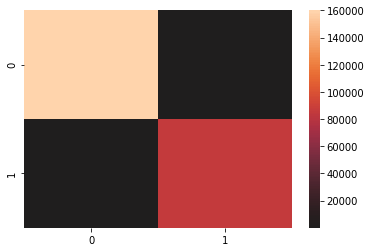

In [22]:
import matplotlib.pyplot as plt

sns.heatmap(cm, center=True)
plt.show()